In [1]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

In [2]:
filterwarnings ('ignore') 
pd.set_option('display.max_columns', None)   
pd.set_option('display.width', 200) 
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# TEXT PREPROCESSING

It gets rid of situations that would be considered problematic in the data set. Structures that need to be removed from a text are eliminated.

In [4]:
df = pd.read_csv("amazon_reviews.csv") # veri setini okuma

In [5]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


### this dataset refers to comments on a product

- reviewerID : people who commented
- asin : product
- helpful : variable related to whether comments are helpful or not
- reviewText : comments, *the variable we will focus on*
- overall : score given to the product
- summary : summary of comments
- helpful_yes,total_vote : expansion of helpful

In [6]:
df['reviewText']  

0                                              No issues.
1       Purchased this for my device, it worked as adv...
2       it works as expected. I should have sprung for...
3       This think has worked out great.Had a diff. br...
4       Bought it with Retail Packaging, arrived legit...
                              ...                        
4910    I bought this Sandisk 16GB Class 10 to use wit...
4911    Used this for extending the capabilities of my...
4912    Great card that is very fast and reliable. It ...
4913    Good amount of space for the stuff I want to d...
4914    I've heard bad things about this 64gb Micro SD...
Name: reviewText, Length: 4915, dtype: object

### Normalizing Case Folding

- some letters in the data are capitalized and some are lowercase, this should be standardized


In [ ]:
# lowercase all words because if the same word started with a capital letter, it would not be found when searching the text 
df['reviewText'] = df['reviewText'].str.lower()
df['reviewText']

### REMOVE PUNCTUATIONS 
- phrases in the text that are not useful to us, that have no meaning for us, should be deleted
- more or less punctuation does not mean anything 

- *regular expression (regex)* 
is a structure used to capture and work with a specific pattern in text



In [ ]:

import re # regex

# a space is inserted instead of a punctuation mark in the text 
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub("[^\w\s]","", str(x)))

df['reviewText']

0                                               No issues
1       Purchased this for my device it worked as adve...
2       it works as expected I should have sprung for ...
3       This think has worked out greatHad a diff bran...
4       Bought it with Retail Packaging arrived legit ...
                              ...                        
4910    I bought this Sandisk GB Class  to use with my...
4911    Used this for extending the capabilities of my...
4912    Great card that is very fast and reliable It c...
4913    Good amount of space for the stuff I want to d...
4914    Ive heard bad things about this gb Micro SD ca...
Name: reviewText, Length: 4915, dtype: object

In [12]:
# REMOVE NUMBERS # in some texts numbers can make sense, not necessary for this data

df['reviewText'] = df['reviewText'].fillna('').apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
df["reviewText"]

0                                               No issues
1       Purchased this for my device it worked as adve...
2       it works as expected I should have sprung for ...
3       This think has worked out greatHad a diff bran...
4       Bought it with Retail Packaging arrived legit ...
                              ...                        
4910    I bought this Sandisk GB Class  to use with my...
4911    Used this for extending the capabilities of my...
4912    Great card that is very fast and reliable It c...
4913    Good amount of space for the stuff I want to d...
4914    Ive heard bad things about this gb Micro SD ca...
Name: reviewText, Length: 4915, dtype: object

### REMOVE STOP WORDS 

- common words that have no meaning in the text but are used in the language: conjunctions, pronouns, etc. (for, is, of) such expressions have no measurable meaning in the language


In [ ]:
import nltk 
nltk.download('stopwords') # download the stopwords list for the English language in the nltk library, similar works for the Turkish language

sw = stopwords.words('english') # these words are imported into sw 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
sw # we can also create our own set

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [17]:
# we have to go through all lines and get all words, for going through all lines in apply df 

# REMOVE STOPWORD # 

df["reviewText"] = df["reviewText"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

# x : incoming line expression
# incoming line is converted to string and split by space, if the resulting word is not in sw, take that word and remove 
df["reviewText"]

0                                               No issues
1       Purchased device worked advertised You never m...
2       works expected I sprung higher capacity I thin...
3       This think worked greatHad diff bran gb card w...
4       Bought Retail Packaging arrived legit orange e...
                              ...                        
4910    I bought Sandisk GB Class use HTC Inspire mont...
4911    Used extending capabilities Samsung Galaxy Not...
4912    Great card fast reliable It comes optional ada...
4913    Good amount space stuff I want fits GoPro What...
4914    Ive heard bad things gb Micro SD card crapping...
Name: reviewText, Length: 4915, dtype: object

### RARE WORDS 

- we can extract rare words from the data set 


In [ ]:
# we can find out how many times all words occur and remove the rare occurrences according to a certain number
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts() # count all words and transfer to temporary dataframe
temp_df

I             7642
card          4408
phone         1637
memory        1256
GB            1223
              ... 
AppSD            1
Support          1
Inew             1
prepard          1
picturesSo       1
Name: count, Length: 11706, dtype: int64

In [20]:
drops = temp_df[temp_df <= 1] # We select frequencies less than 2 and drop them
drops

stealWould    1
memoryFor     1
brainerThe    1
PERMANENT     1
ARCHIVE       1
             ..
AppSD         1
Support       1
Inew          1
prepard       1
picturesSo    1
Name: count, Length: 6764, dtype: int64

In [22]:
df["reviewText"] = df["reviewText"].apply(lambda x: " " .join(x for x in str(x).split() if x not in drops)) # replace drops with spaces
df["reviewText"]

0                                               No issues
1       Purchased device worked advertised You never m...
2       works expected I higher capacity I think made ...
3       This think worked gb card went south one held ...
4       Bought Retail Packaging arrived legit envelope...
                              ...                        
4910    I bought Sandisk GB Class use HTC Inspire mont...
4911    Used capabilities Samsung Galaxy Note It great...
4912    Great card fast reliable It comes optional ada...
4913    Good amount space stuff I want fits GoPro What...
4914    Ive heard bad things gb Micro SD card crapping...
Name: reviewText, Length: 4915, dtype: object

### TOKENIZATION 

- tokenizing sentences, i.e. breaking them into tokens, making the unitization process programmatic


In [ ]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
! python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [30]:
df['reviewText'].apply(lambda x: TextBlob(x).words).head() # Get the words after the TextBlob method is executed

0                                         [No, issues]
1    [Purchased, device, worked, advertised, You, n...
2    [works, expected, I, higher, capacity, I, thin...
3    [This, think, worked, gb, card, went, south, o...
4    [Bought, Retail, Packaging, arrived, legit, en...
Name: reviewText, dtype: object

### LEMMATIZATION 

- rooting words / stemming is also used in the literature to root words
- en: eliminate the -s at the end of words, en: glasses, optician => eye


In [ ]:

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) # splits all words into their roots
df['reviewText']

0                                                No issue
1       Purchased device worked advertised You never m...
2       work expected I higher capacity I think made b...
3       This think worked gb card went south one held ...
4       Bought Retail Packaging arrived legit envelope...
                              ...                        
4910    I bought Sandisk GB Class use HTC Inspire mont...
4911    Used capability Samsung Galaxy Note It greatly...
4912    Great card fast reliable It come optional adap...
4913    Good amount space stuff I want fit GoPro What ...
4914    Ive heard bad thing gb Micro SD card crapping ...
Name: reviewText, Length: 4915, dtype: object

# TEXT VISUALIZATION

In [34]:
# The texts must first be digitized. So the frequencies of the words should be extracted.
tf = df['reviewText'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"] # add column headings 
tf

,words,tf
0,No,303.00
1,issue,606.00
2,Purchased,51.00
3,device,578.00
4,worked,410.00
...,...,...
4562,laptoptablet,2.00
4563,employee,2.00
4564,sandiskSequential,2.00
4565,IMPORTANT,2.00


In [36]:
tf.sort_values('tf', ascending=False) # sorted from largest to smallest

,words,tf
12,I,7642.00
30,card,5324.00
9,phone,1855.00
17,work,1634.00
10,memory,1272.00
...,...,...
4566,chkdsk,2.00
4519,WORK,2.00
4487,remains,2.00
4544,itit,2.00


### BAR CHART (BART PLOT)

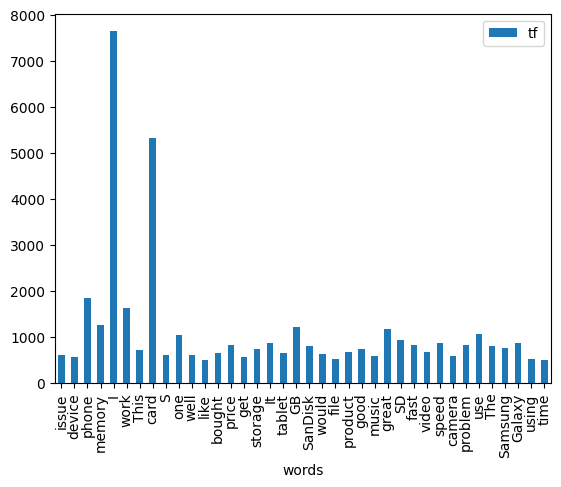

In [ ]:
# It would not make sense to plot 3687 data, so we will select data according to a certain condition

tf[tf["tf"] > 500].plot.bar(x="words", y="tf") # plot a bar chart of words with frequency greater than 500
plt.show()
# by looking at these words one can decide what the product is 
# if we had gotten here using overall, we could have looked at which words were used more in those with low scores and filtered the dataset accordingly # the most striking comments about the product could have been obtained #

### WORD CLOUD 

- creating a visual in the form of a cloud according to the frequencies of the words
- has many features 


In [ ]:
# we have to go through all the lines and join them as a single sentence
text = " ".join(i for i in df.reviewText)
text

'No issue Purchased device worked advertised You never much phone memory since I download lot stuff brainer work expected I higher capacity I think made bit earlier version paint look clean This think worked gb card went south one held pretty well since I S Note update Ive month ZERO issue since transferred S Note note This card reliable Bought Retail Packaging arrived legit envelope version like picture show arrived quickly bought retail packaging htc one Optimus card working order probably best price youll get nice sd card Its mini storage It doesnt anything else supposed I purchased add additional storage Microsoft Surface Pro tablet come GB It supposed SanDisk long standing reputation speaks I phone never skip beat File transfer speedy corruption issue memory issue I would expect Sandisk brand Great card Why precious file slightly cheaper piece crap If lose everything spending extra couple buck trusted product go good QA Its hard believe affordable digital become GB device one quar

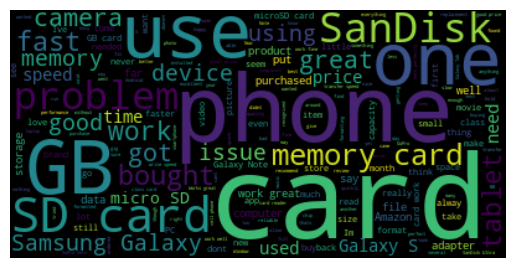

In [40]:
wordCloud = WordCloud().generate(text)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()
# words with high frequencies are in large form, it calculates the frequencies itself
# WordCloud() includes more features

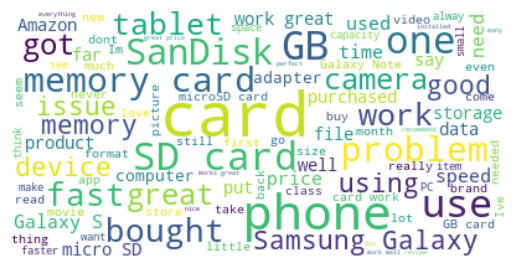

In [43]:
wordcloud = WordCloud(max_font_size=50,max_words=100,background_color='white').generate (text)
# we can also create wordcloud according to specific format as above
plt.figure()
plt.imshow (wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# wordcloud.to_file(“wordcloud.png”) # saved

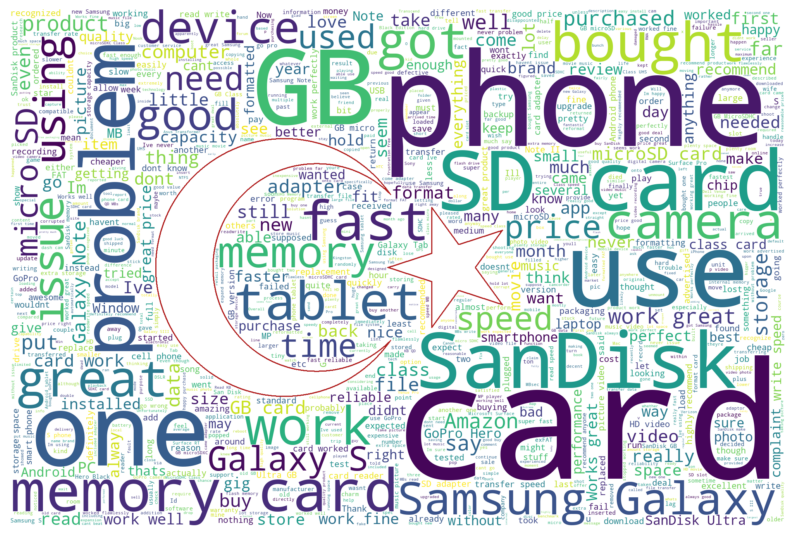

In [46]:
tr_mask = np.array(Image.open("tr.png"))  # template image

wc = WordCloud(background_color="white", max_words=1000, mask=tr_mask, contour_width=3, contour_color="firebrick")
wc.generate(text)

plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# SYNTHESIS MODELING

The texts we have will be emotionally analyzed.

In [48]:
df['reviewText'].head() # ‘device’ has a neutral meaning, “never” has no positive meaning

0                                             No issue
1    Purchased device worked advertised You never m...
2    work expected I higher capacity I think made b...
3    This think worked gb card went south one held ...
4    Bought Retail Packaging arrived legit envelope...
Name: reviewText, dtype: object

In [50]:
# a list to decide whether words are positive or negative

nltk.download('vader_lexicon') # A pre-trained model used for Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# the positive and negative scores of the sentence are obtained, the scores are between 1 and -1 
# If ‘compound’ is greater than 0, a positive meaning is inferred, if less than 0, a negative meaning is inferred

sia = SentimentIntensityAnalyzer() # this model returns positive and negative scores
sia.polarity_scores("The movie was awesome") # 'compound': 0.6249 / positive sentiment dominates
sia.polarity_scores("I like this music but it is not good as the other one") # ‘compound’: -0.3311 / negative sentiment predominates

{'neg': 0.209, 'neu': 0.673, 'pos': 0.118, 'compound': -0.3311}

In [52]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)) # we got the sentiment scores of 10 sentences 
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)['compound']) # we got only the 'compound' values

0   -0.30
1    0.00
2    0.40
3    0.65
4    0.86
5    0.00
6    0.87
7    0.82
8    0.00
9    0.92
Name: reviewText, dtype: float64

In [56]:
df['polarity_scores'] = df['reviewText'].apply(lambda x: sia.polarity_scores(x)['compound']) # Scores assigned to a new column in df

In [57]:
df.head()
# Using the “polarity_scores” column and the “overall” column, contrasts in the dataset can be found. For example, if the “overall” value is low but the “polarity_scores” value is high, there is a contradiction in the interpretation.

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_scores
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,-0.30
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",Purchased device worked advertised You never m...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected I higher capacity I think made b...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think worked gb card went south one held ...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",Bought Retail Packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86


In [58]:
# Using the "polarity_scores" column and the "overall" column, contradictions in the dataset can be found. 
# For example, if the "overall" value is greater than 3 but the "polarity_scores" value is less than 0, it can be understood that there is a contradiction in the comment.
tf = df[df["overall"] > 3 ] 
tf[tf["polarity_scores"] < 0] # 436 comments have contradictions

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_scores
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,-0.30
19,A2ELBSIZ26GKM2,B007WTAJTO,Aaron,"[0, 0]",This work No video stuttering like gb blah bla...,5.00,works,1389052800,2014-07-01,160,0,0,-0.49
20,A6AL9BZ0JALUP,B007WTAJTO,Aaron,"[0, 0]",Works expected High transfer speed Nice extra ...,5.00,Works,1382832000,2013-10-27,407,0,0,-0.15
24,A243XIFG20QRQW,B007WTAJTO,Aaron Nash,"[0, 0]",San disk hard beat You pay brand get quality p...,5.00,Perfect,1395532800,2014-03-23,260,0,0,-0.20
34,A747BB4QM2SWW,B007WTAJTO,A. Bell,"[0, 0]",Ive got couple varying size Ive problem compla...,5.00,several sizes. zero issues.,1376784000,2013-08-18,477,0,0,-0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4864,A3K8V7WFKJBQWG,B007WTAJTO,"xendula ""avid e-Book reader""","[0, 0]",In constant use Samsung Ativ since January pro...,5.00,Constant use since January '13 - going strong,1385337600,2013-11-25,378,0,0,-0.40
4868,A1OTC0E0KG0TYH,B007WTAJTO,Xpolicy,"[0, 0]",No problem I use Samsung Note It little slow w...,4.00,No Problem,1396310400,2014-01-04,338,0,0,-0.60
4886,A2IJ276VBT3V7S,B007WTAJTO,Yvonne M. Bennett,"[0, 0]",I purchased tablet It hold lot information I p...,5.00,Works well,1396569600,2014-04-04,248,0,0,-0.40
4898,A3RR7N0Y5OPRNF,B007WTAJTO,Z. Duncan,"[0, 0]",Im using point shoot camera never ever run spa...,5.00,Bigger is always better,1391385600,2014-03-02,281,0,0,-0.34


## SENTIMENTAL STATE MODELING

- Specialty Engineering 

We want to understand whether a comment is positive or negative, so we want to create a binary classification model. 

- unsupervise learning --> supervise learning transition: First using "polarity_scores" to create labels based on values above and below a certain treshold, and then predicting labels without using "polarity_scores" when a new comment comes in.

In [60]:
df['reviewText'][0:10].apply(lambda x: 'pos' if sia.polarity_scores (x) ['compound']> 0 else 'neg') # We labeled according to “polarity_scores”

0    neg
1    neg
2    pos
3    pos
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: reviewText, dtype: object

In [61]:
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores (x) ["compound"] > 0 else "neg") # we created our dependent variable
df["sentiment_label"].value_counts()

sentiment_label
pos    3891
neg    1024
Name: count, dtype: int64

In [63]:
df.groupby('sentiment_label')['overall'].mean() # we looked at the average values

sentiment_label
neg   4.11
pos   4.71
Name: overall, dtype: float64

In [64]:
df ["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"]) # convert to 0-1 for better understanding by machine learning models 
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_scores,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,-0.30,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",Purchased device worked advertised You never m...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected I higher capacity I think made b...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40,1
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think worked gb card went south one held ...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65,1
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",Bought Retail Packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,A2LBMKXRM5H2W9,B007WTAJTO,"ZM ""J""","[0, 0]",I bought Sandisk GB Class use HTC Inspire mont...,1.00,Do not waste your money.,1374537600,2013-07-23,503,0,0,0.08,1
4911,ALGDLRUI1ZPCS,B007WTAJTO,Zo,"[0, 0]",Used capability Samsung Galaxy Note It greatly...,5.00,Great item!,1377129600,2013-08-22,473,0,0,0.18,1
4912,A2MR1NI0ENW2AD,B007WTAJTO,Z S Liske,"[0, 0]",Great card fast reliable It come optional adap...,5.00,Fast and reliable memory card,1396224000,2014-03-31,252,0,0,0.85,1
4913,A37E6P3DSO9QJD,B007WTAJTO,Z Taylor,"[0, 0]",Good amount space stuff I want fit GoPro What ...,5.00,Great little card,1379289600,2013-09-16,448,0,0,0.69,1


In [65]:
y = df["sentiment_label"] # dependent variable 
x = df["reviewText"] # independent variable / * these are now text, it is necessary to put it in measurable format (the most important part of NLP) *

#### It is necessary to produce featurettes with mathematical measurements from the text, that is, to make the text mathematical. The words must be vectorized. This is the most critical point of NLP.

Word vectorization methods:
- Count Vectors: Extraction of frequencies of words, frequency representations. Extracting the number of times a word occurs in a text.
- TF-IDF Vectors: normalized frequency representations
- Word Embeddings (Word2Vec, Glove, BERT etc)


Among Word2Vec, GloVe and FastText, FastText is the most widely used today.

## COUNT VECTORS
 
- A word vectorization methods
- Extraction of frequencies of words, frequency representations. Extracting the number of times a word occurs in a text.

In [66]:
# HOW TO REPRESENT WORDS FOR COUNT VECTORS?
# * words
# Numerical representations of words  
# * characters
# numeric representations of characters
# * ngram
a = """I will show this example on a longer text for clarity.
N-grams show combinations of words used together and are used to generate features"""
TextBlob(a).ngrams(3) # Break up the text by taking phrases of 3

[WordList(['I', 'will', 'show']),
 WordList(['will', 'show', 'this']),
 WordList(['show', 'this', 'example']),
 WordList(['this', 'example', 'on']),
 WordList(['example', 'on', 'a']),
 WordList(['on', 'a', 'longer']),
 WordList(['a', 'longer', 'text']),
 WordList(['longer', 'text', 'for']),
 WordList(['text', 'for', 'clarity']),
 WordList(['for', 'clarity', 'N-grams']),
 WordList(['clarity', 'N-grams', 'show']),
 WordList(['N-grams', 'show', 'combinations']),
 WordList(['show', 'combinations', 'of']),
 WordList(['combinations', 'of', 'words']),
 WordList(['of', 'words', 'used']),
 WordList(['words', 'used', 'together']),
 WordList(['used', 'together', 'and']),
 WordList(['together', 'and', 'are']),
 WordList(['and', 'are', 'used']),
 WordList(['are', 'used', 'to']),
 WordList(['used', 'to', 'generate']),
 WordList(['to', 'generate', 'features'])]

In [ ]:
# COUNT VECTORS

from sklearn. feature_extraction. text import CountVectorizer
corpus = ['Bu ilk belge.',
'Bu belge ikinci belge.',
'Ve bu üçüncü belge.',
'Bu ilk belge mi?']

#word frekans
vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out()) # "corpus" verisini tek bir metin gibi düşünüp içerisindeki eşsiz kelimeler getirilir. 
X_c.toarray()

# VALIDATION 
"""
The frequencies of unique words are added as columns in the same row, no matter how many times they occur in each row. 
We look at the word 'and' whether it is in the first row or not so it is '0', whether the word 'document' is in the first row or not there is 1 so it is '1', whether the word 'document' is in the second row there are 2 so it is '2'.
In this way we have mathematized the corpus. 
"""

['belge' 'bu' 'ikinci' 'ilk' 'mi' 've' 'üçüncü']


"\nThe frequencies of unique words are added as columns in the same row, no matter how many times they occur in each row. \nWe look at the word 'and' whether it is in the first row or not so it is '0', whether the word 'document' is in the first row or not there is 1 so it is '1', whether the word 'document' is in the second row there are 2 so it is '2'.\nIn this way we have mathematized the corpus. \n"

In [72]:
#n-gram frequency
vectorizer2 = CountVectorizer (analyzer='word', ngram_range=(2, 2)) # we will do the job based on the ngrams of the words instead of their frequencies
X_n = vectorizer2.fit_transform (corpus)
print(vectorizer2.get_feature_names_out()) # new variables are generated with unique words, 2-word phrases
X_n.toarray()

"""
 The expression 'and this' is not in the first line '0', the expression 'first document' is mathematized as '1' in the first line '1'.
"""

['belge ikinci' 'belge mi' 'bu belge' 'bu ilk' 'bu üçüncü' 'ikinci belge'
 'ilk belge' 've bu' 'üçüncü belge']


"\n The expression 'and this' is not in the first line '0', the expression 'first document' is mathematized as '1' in the first line '1'.\n"

In [73]:
# COUNT VECTOR BY OUR OWN DATA 
vectorizer = CountVectorizer()
x_count = vectorizer.fit_transform(x) # argument 
print(vectorizer.get_feature_names_out()[10:15]) # some unique words
x_count.toarray()[10:15] # frequencies

['accepts' 'access' 'accessed' 'accessible' 'accessing']


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5, 3694))

### TF-IDF VETORS

It is a method of creating a normalized, standardized word vector to overcome some of the biases introduced by Count Vectors.

Steps:
- Count Vectorizer is calculated (the frequency of each unique word (term t) in each document (comment, tweet, etc.))
- TF (Term Frequency) is calculated (frequency of term t in the relevant document/total number of terms in the document)
- IDF (Inverse Document Frequency) is calculated. ( 1 + loge((total number of documents + 1)/(number of documents with t terms + 1))
- TF*IDF is calculated (TF from each document multiplied by IDF cells)
- Do L2 Normalization. ( “Find the square root of the sum of the square roots of the square roots of the cells for each row in the matrix obtained as a result of TF*IDF and divide all cells in the relevant row by the value you found”)

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

# sözcük
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(x)
#print("X_tf_idf_word: " , X_tf_idf_word)
print(tf_idf_word_vectorizer.get_feature_names_out()[10:15]) # bazı eşsiz kelimeler

# ngram
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(x)
#print("X_tf_idf_ngram: " , X_tf_idf_ngram)
print(tf_idf_ngram_vectorizer.get_feature_names_out()[10:15]) # bazı eşsiz kelime öbekleri

['accepts' 'access' 'accessed' 'accessible' 'accessing']
['ability easily' 'ability easily handle' 'ability figured'
 'ability figured id' 'ability find']


### SENTİMENT MODELING

1. Text Preprocessing
2. Text Visualization
3. Sentiment Analysis
4. Feature Engineering
5. Sentiment Modeling

## LOGISTIC REGRESYON 

In [75]:
# Model creation
log_model = LogisticRegression().fit(X_tf_idf_word, y) # We created a model with the independent variable and dependent variable we created with TF-IDF

In [76]:
# 5-fold cross validation 
cross_val_score(log_model, X_tf_idf_word, y, scoring="accuracy", cv=5).mean()

np.float64(0.8282807731434385)

In [78]:
new_review = pd.Series('This product is great') # need to put it in the same format as the arguments

In [79]:
# TF-IDF Vectorizer should be passed this data 
new_review = TfidfVectorizer().fit(x).transform(new_review)

In [80]:
log_model.predict(new_review) # predict whether the review is positive or negative / array([1]) => positive

array([1])

In [81]:
import joblib
# Save the model to file
model_path = 'model.pkl'
joblib.dump(log_model, model_path)

['model.pkl']

In [82]:
new_review2 = pd.Series("look at that shit very bad")
new_review2 = TfidfVectorizer().fit(x).transform(new_review2)
log_model.predict(new_review2) # array([0]) => negatif

array([0])

In [83]:
random_review = pd.Series(df["reviewText"].sample(1).values)  # Picked 1 random sample from df["reviewText"] and made it guess
print(random_review)
random_review = TfidfVectorizer().fit(x).transform(random_review)
log_model.predict(random_review) # array([1])

0    It hard imagine GB something smaller postage s...
dtype: object


array([1])

In [84]:
random_review = pd.Series(df["reviewText"].sample(3).values) # took 3 random samples from df["reviewText"] and made them guess
print(random_review)
random_review = TfidfVectorizer().fit(x).transform(random_review)
log_model.predict(random_review) # array([1])

0    This card lot room everything A Class card go ...
1    I card month Galaxy S suddenly went read mode ...
2    I bought chip used increase use smart phone in...
dtype: object


array([1, 0, 1])